In [2]:
#Imports the Pandas library for data manipulation and analysis.
import pandas as pd
# Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
#Imports the NumPy library for numerical computations.
import numpy as np
#Standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
#Splits your dataset into training and testing sets.
from sklearn.model_selection import train_test_split
99999999999
from sklearn.linear_model import LinearRegression
#Measures the goodness of fit of the model.
from sklearn.metrics import r2_score
# Measures the accuracy of a classification model.
from sklearn.metrics import accuracy_score
#Measures the average of the squares of the errors.
from sklearn.metrics import mean_squared_error
#Converts categorical labels into numeric form.
from sklearn.preprocessing import LabelEncoder

In [3]:
#line of code reads a CSV file named insurance.csv located in the Dataset directory into a pandas DataFrame called df.
df=pd.read_csv('Dataset/insurance.csv')
#Prints the first few rows of the DataFrame
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Displays the number of rows and columns in the DataFrame.
df.shape

(1338, 7)

In [5]:
##Generates descriptive statistics for the DataFrame.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


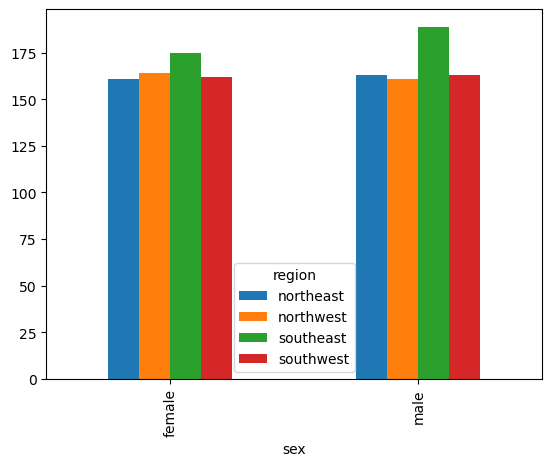

In [6]:
#creates a pivot table from the DataFrame df. This pivot table summarizes data by aggregating the counts of occurrences based on the specified index and columns.
pivot_table = df.pivot_table(index='sex', columns='region', aggfunc='size')
#is used to create a bar chart from the pivot table generated earlier. 
pivot_table.plot(kind='bar')
#Displays the pie chart.
plt.show()

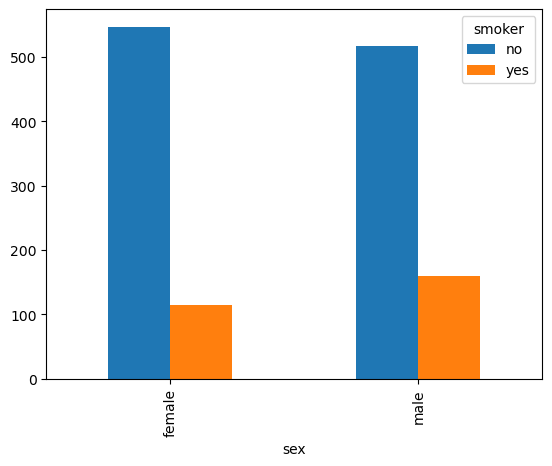

In [7]:
#creates a pivot table from the DataFrame df. This pivot table summarizes data by aggregating the counts of occurrences based on the specified index and columns.
pivot_table = df.pivot_table(index='sex', columns='smoker', aggfunc='size')
#is used to create a bar chart from the pivot table generated earlier. 
pivot_table.plot(kind='bar')
#Displays the pie chart.
plt.show()

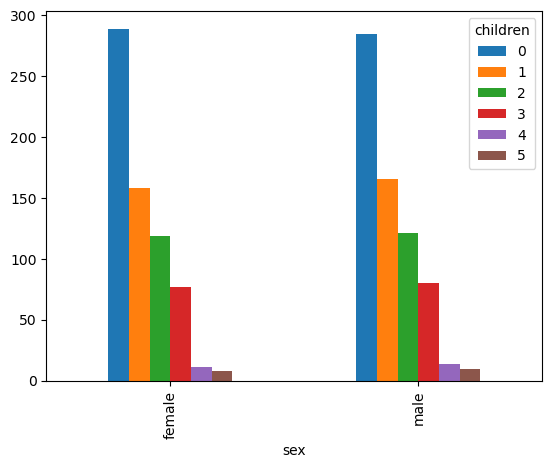

In [8]:
#creates a pivot table from the DataFrame df. This pivot table summarizes data by aggregating the counts of occurrences based on the specified index and columns.
pivot_table = df.pivot_table(index='children', columns='', aggfunc='size')
#is used to create a bar chart from the pivot table generated earlier. 
pivot_table.plot(kind='bar')
#Displays the pie chart.
plt.show()

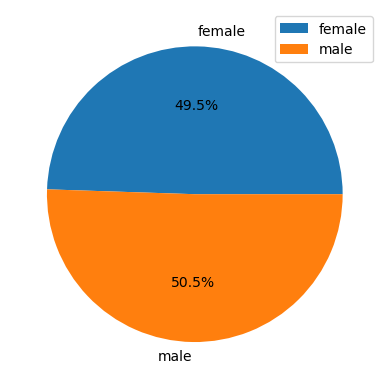

In [32]:
pivot_table = df.pivot_table(index='sex', values='smoker', aggfunc='count')
pivot_table.plot(kind='pie', y='smoker', autopct='%1.1f%%', legend=True)
plt.ylabel('')  
plt.show()

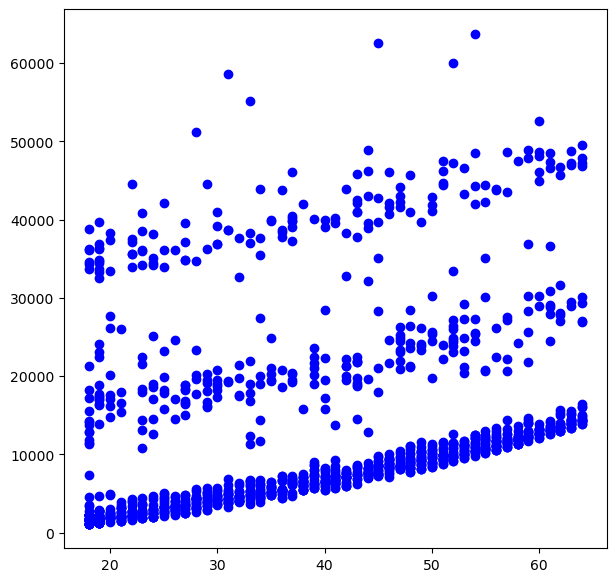

In [111]:
plt.figure(figsize=(7, 7))
plt.scatter(df['age'], df['charges'], color='blue')
plt.show()

In [34]:
#used to create a new DataFrame df1 by selecting a specific subset of columns from an existing DataFrame df.
df1=df[['age','bmi','children','charges']]
df1

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [36]:
#is used to compute the pairwise correlation of columns in the DataFrame df1.
df1.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [38]:
#check for missing values in a pandas DataFrame df and summarize the number of missing values in each column.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
#identify and count the number of duplicate rows in a pandas DataFrame df.
df.duplicated().sum()

1

In [42]:
#his is a common tool used in machine learning preprocessing to convert categorical labels into numeric form.
label_encoder = LabelEncoder()
#This converts the string (or categorical) values in these columns into numeric values, which are more suitable for machine learning algorithms that require numeric input.
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [44]:
#This scaler is used to standardize features by removing the mean and scaling to unit variance.
s_scaler = StandardScaler()

In [46]:
#Fit and transform the data
df.df=s_scaler.fit_transform(df)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\2683208760.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.df=s_scaler.fit_transform(df)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [48]:
#preparing your data for modeling by separating the features from the target variable.
x=df.drop(['charges'],axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [50]:
#creating a DataFrame y that contains only the charges column. 
y=df[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [52]:
#your dataset into training and testing sets. This is a common practice to evaluate the performance of machine learning models.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
#ou can check the shapes of the resulting datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003, 1), (335, 1))

In [54]:
# class provided by scikit-learn that represents the linear regression algorithm.
model=LinearRegression()
model

LinearRegression()

In [73]:
#you are training the linear regression model on your entire dataset fit the model.
model.fit(x_train,y_train)

LinearRegression()

In [75]:
# the coefficients (weights) of the features.
model.coef_

array([[  260.43276662,  -380.59860614,   325.32559025,   605.89947877,
        23870.07259885,  -341.03502413]])

In [77]:
#provides the intercept (also known as the bias term) of the regression line.
model.intercept_

array([-11661.6118363])

In [79]:
#make predictions on your test data using the trained linear regression model. 
y_pred=model.predict(x_test)
y_pred

array([[ 2823.3581132 ],
       [27782.71091239],
       [11660.24795808],
       [ 4756.52520589],
       [ 8506.75286825],
       [35367.32441034],
       [11557.71036197],
       [11549.46605923],
       [ 8479.00387689],
       [10815.09421051],
       [15248.69309073],
       [10979.3436712 ],
       [ 5083.85802876],
       [ 9065.09475415],
       [ 8490.64654954],
       [ 9064.05813736],
       [31982.47345995],
       [12676.02895554],
       [13483.87237835],
       [ 7710.73499207],
       [29165.20982575],
       [ 1926.98250506],
       [ 2866.37957998],
       [ 3917.86673277],
       [ 2844.70924256],
       [ 9369.93546474],
       [37301.65365499],
       [17049.67091266],
       [10744.86860152],
       [14067.90115808],
       [13326.54385746],
       [  755.0488337 ],
       [ 5618.93979619],
       [11000.19283606],
       [31591.01581964],
       [ 4094.90056885],
       [ 6354.64886964],
       [ 2521.39844091],
       [ 6424.46916745],
       [ 5927.68214688],


In [81]:
#the R² score (coefficient of determination) of the model
R2_score=model.score(x,y)
R2_score


0.7503809654636201

In [83]:
#Convert R² score to a percentage
score=R2_score*100
score

75.03809654636201

In [85]:
#attempt to derive an accuracy-like metric from the Mean Squared Error (MSE).
acc=1-mean_squared_error(y_test,y_pred)
acc

-34426835.03249466

In [87]:
#convert to percentage
acc = acc*100
acc

-3442683503.2494655